# タイタニックの分析
## ライブラリのインポート

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 訓練データの読み込み

In [90]:
df_train = pd.read_csv("train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 敬称を特徴量化

In [93]:
df_train["Name"] = df_train["Name"].map(lambda x:x.split(",")[1].split(".")[0])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,male,26.0,0,0,111369,30.0000,C148,C


## 欠損とデータ型の確認

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 使用しない変数の削除
Ticketはどう特徴量にすべきかわからなく、Cabinは欠損が多すぎるため。

In [99]:
df_train["Cabin"] = df_train["Cabin"].str.get(0)
df_train["Cabin"] = df_train["Cabin"].fillna("U")

## Embarkedを埋める
欠損の数が少ないため代表値として最頻値を使う

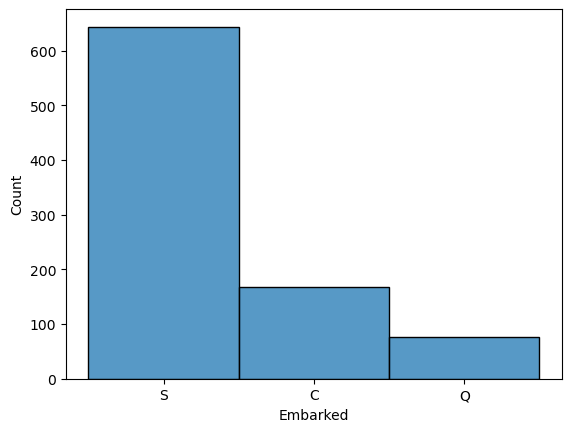

In [102]:
sns.histplot(df_train["Embarked"])
plt.show()

In [103]:
df_train["Embarked"] = df_train["Embarked"].fillna("S")

## 欠損を確認

In [107]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

### インデックスを指定して削除

欠損がなくなった
## テストデータの読み込み

In [111]:
df_train.index = df_train["PassengerId"]
df_train = df_train.drop("PassengerId", axis=1)
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,U,S
2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C,C
3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C,S
5,0,3,Mr,male,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,Rev,male,27.0,0,0,211536,13.0000,U,S
888,1,1,Miss,female,19.0,0,0,112053,30.0000,B,S
889,0,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,U,S


In [113]:
df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## 敬称を特徴量化

In [116]:
df_test.index = df_test["PassengerId"]
df_test = df_test.drop(["PassengerId"], axis=1)
df_test["Cabin"] = df_test["Cabin"].str.get(0)
df_test["Cabin"] = df_test["Cabin"].fillna("U")

## インデックスの指定と削除

In [119]:
df_test["Name"] = df_test["Name"].map(lambda x:x.split(",")[1].split(".")[0])
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,Mr,male,34.5,0,0,330911,7.8292,U,Q
893,3,Mrs,female,47.0,1,0,363272,7.0000,U,S
894,2,Mr,male,62.0,0,0,240276,9.6875,U,Q
895,3,Mr,male,27.0,0,0,315154,8.6625,U,S
896,3,Mrs,female,22.0,1,1,3101298,12.2875,U,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,A.5. 3236,8.0500,U,S
1306,1,Dona,female,39.0,0,0,PC 17758,108.9000,C,C
1307,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,U,S


In [121]:
df = pd.concat([df_train, df_test])
tc = dict(df['Ticket'].value_counts())
df_train["Ticket"] = df["Ticket"].map(tc)
df_test["Ticket"] = df["Ticket"].map(tc)

In [123]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Mr,male,22.0,1,0,1,7.2500,U,S
2,1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
3,1,3,Miss,female,26.0,0,0,1,7.9250,U,S
4,1,1,Mrs,female,35.0,1,0,2,53.1000,C,S
5,0,3,Mr,male,35.0,0,0,1,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,Rev,male,27.0,0,0,1,13.0000,U,S
888,1,1,Miss,female,19.0,0,0,1,30.0000,B,S
889,0,3,Miss,female,NaN,1,2,4,23.4500,U,S


## Ageの欠損を埋める
Ageは欠損の数が多いため機械学習を使う
### ダミー変数化

In [126]:
df_train = pd.get_dummies(df_train)
df_train

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Name_ Capt,Name_ Col,Name_ Don,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,1,7.2500,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,1,1,38.0,1,0,2,71.2833,False,False,False,...,True,False,False,False,False,False,False,True,False,False
3,1,3,26.0,0,0,1,7.9250,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,1,1,35.0,1,0,2,53.1000,False,False,False,...,True,False,False,False,False,False,False,False,False,True
5,0,3,35.0,0,0,1,8.0500,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,1,13.0000,False,False,False,...,False,False,False,False,False,False,True,False,False,True
888,1,1,19.0,0,0,1,30.0000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
889,0,3,NaN,1,2,4,23.4500,False,False,False,...,False,False,False,False,False,False,True,False,False,True


### 機械学習でAgeを埋める

In [129]:
x_train = df_train.dropna().drop("Age", axis=1)
x_test = df_train[df_train["Age"].isnull()].drop("Age", axis=1)
y_train = df_train.dropna()["Age"]

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

In [133]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [135]:
pred = pd.DataFrame(y_pred)
pred.columns = ["Age"]
pred.index = x_test.index
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, pred], axis=1)
df_train = pd.concat([train, test])
df_train

,Survived,Pclass,SibSp,Parch,Ticket,Fare,Name_ Capt,Name_ Col,Name_ Don,Name_ Dr,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Age
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,0,1,7.2500,False,False,False,False,...,False,False,False,False,False,True,False,False,True,22.000000
2,1,1,1,0,2,71.2833,False,False,False,False,...,False,False,False,False,False,False,True,False,False,38.000000
3,1,3,0,0,1,7.9250,False,False,False,False,...,False,False,False,False,False,True,False,False,True,26.000000
4,1,1,1,0,2,53.1000,False,False,False,False,...,False,False,False,False,False,False,False,False,True,35.000000
5,0,3,0,0,1,8.0500,False,False,False,False,...,False,False,False,False,False,True,False,False,True,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,0,0,1,7.2292,False,False,False,False,...,False,False,False,False,False,True,True,False,False,27.962933
864,0,3,8,2,11,69.5500,False,False,False,False,...,False,False,False,False,False,True,False,False,True,8.531220
869,0,3,0,0,1,9.5000,False,False,False,False,...,False,False,False,False,False,True,False,False,True,29.151727


In [137]:
df_train.isnull().sum()

Survived              0
Pclass                0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Name_ Capt            0
Name_ Col             0
Name_ Don             0
Name_ Dr              0
Name_ Jonkheer        0
Name_ Lady            0
Name_ Major           0
Name_ Master          0
Name_ Miss            0
Name_ Mlle            0
Name_ Mme             0
Name_ Mr              0
Name_ Mrs             0
Name_ Ms              0
Name_ Rev             0
Name_ Sir             0
Name_ the Countess    0
Sex_female            0
Sex_male              0
Cabin_A               0
Cabin_B               0
Cabin_C               0
Cabin_D               0
Cabin_E               0
Cabin_F               0
Cabin_G               0
Cabin_T               0
Cabin_U               0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Age                   0
dtype: int64

## 欠損とデータの型を確認

In [140]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    int64  
 7   Fare      417 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.9+ KB


## Fareの欠損を埋める
400くらいのデータ数なのでbinsを40でヒストグラムを作成する。

(array([175.,  90.,  58.,  15.,  21.,  14.,  10.,   3.,   2.,   0.,   6.,
          3.,   2.,   0.,   0.,   0.,   5.,   4.,   0.,   1.,   7.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  12.80823,  25.61646,  38.42469,  51.23292,  64.04115,
         76.84938,  89.65761, 102.46584, 115.27407, 128.0823 , 140.89053,
        153.69876, 166.50699, 179.31522, 192.12345, 204.93168, 217.73991,
        230.54814, 243.35637, 256.1646 , 268.97283, 281.78106, 294.58929,
        307.39752, 320.20575, 333.01398, 345.82221, 358.63044, 371.43867,
        384.2469 , 397.05513, 409.86336, 422.67159, 435.47982, 448.28805,
        461.09628, 473.90451, 486.71274, 499.52097, 512.3292 ]),
 <BarContainer object of 40 artists>)

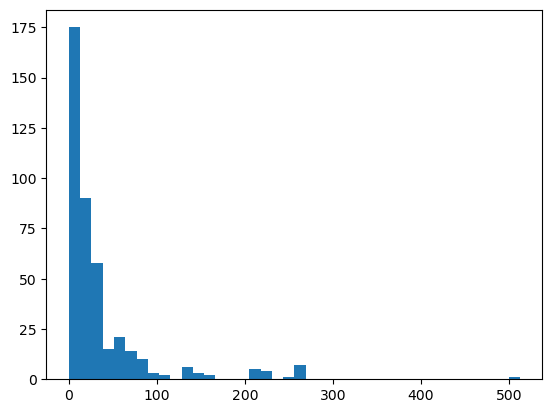

In [143]:
plt.hist(df_test["Fare"], bins=40)

外れ値が大きいため中央値で補完する。

In [146]:
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())

## Ageの欠損を埋める

In [149]:
df_test = pd.get_dummies(df_test)
df_test

,Pclass,Age,SibSp,Parch,Ticket,Fare,Name_ Col,Name_ Dona,Name_ Dr,Name_ Master,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34.5,0,0,1,7.8292,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
893,3,47.0,1,0,1,7.0000,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
894,2,62.0,0,0,1,9.6875,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
895,3,27.0,0,0,1,8.6625,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
896,3,22.0,1,1,2,12.2875,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,NaN,0,0,1,8.0500,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1306,1,39.0,0,0,3,108.9000,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1307,3,38.5,0,0,1,7.2500,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


### 機械学習で埋める

In [152]:
x_train = df_test.dropna().drop("Age", axis=1)
x_test = df_test[df_test["Age"].isnull()].drop("Age", axis=1)
y_train = df_test.dropna()["Age"]

In [154]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [156]:
pred = pd.DataFrame(y_pred)
pred.index = x_test.index
pred.columns = ["Age"]
test = pd.concat([x_test, pred], axis=1)
train = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([train, test])
df_test

,Pclass,SibSp,Parch,Ticket,Fare,Name_ Col,Name_ Dona,Name_ Dr,Name_ Master,Name_ Miss,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Age
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,0,0,1,7.8292,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,34.500000
893,3,1,0,1,7.0000,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,47.000000
894,2,0,0,1,9.6875,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,62.000000
895,3,0,0,1,8.6625,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,27.000000
896,3,1,1,2,12.2875,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3,0,0,1,7.7208,False,False,False,False,True,...,False,False,False,False,False,True,False,True,False,24.492258
1302,3,0,0,1,7.7500,False,False,False,False,True,...,False,False,False,False,False,True,False,True,False,24.492258
1305,3,0,0,1,8.0500,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,26.226847


# カラムの確認
敬称の数が合っているか確認

In [159]:
df_train.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Name_ Capt',
       'Name_ Col', 'Name_ Don', 'Name_ Dr', 'Name_ Jonkheer', 'Name_ Lady',
       'Name_ Major', 'Name_ Master', 'Name_ Miss', 'Name_ Mlle', 'Name_ Mme',
       'Name_ Mr', 'Name_ Mrs', 'Name_ Ms', 'Name_ Rev', 'Name_ Sir',
       'Name_ the Countess', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_U', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age'],
      dtype='object')

In [161]:
df_test.columns

Index(['Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Name_ Col', 'Name_ Dona',
       'Name_ Dr', 'Name_ Master', 'Name_ Miss', 'Name_ Mr', 'Name_ Mrs',
       'Name_ Ms', 'Name_ Rev', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_U',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age'],
      dtype='object')

敬称の数が合っていないため合わせる。
# 存在しない敬称を確認

In [164]:
for col in df_train.columns:
    if col not in df_test.columns:
        print("'"+ col +"',")

'Survived',
'Name_ Capt',
'Name_ Don',
'Name_ Jonkheer',
'Name_ Lady',
'Name_ Major',
'Name_ Mlle',
'Name_ Mme',
'Name_ Sir',
'Name_ the Countess',
'Cabin_T',


# 敬称を埋める関数を作成
敬称がなければ必ずFalseになるためFalseで埋める。

In [167]:
def concat(df, columns):
    for col in columns:
        tmp = []
        for i in range(len(df["Age"])):
            tmp.append(False)
        Capt = pd.DataFrame(tmp)
        Capt.index = df.index
        Capt.columns = [col]
        df = pd.concat([df, Capt], axis=1)
    return df

# テストデータの敬称を埋める

In [170]:
df_test = concat(df_test, ['Name_ Capt',
                            'Name_ Don',
                            'Name_ Jonkheer',
                            'Name_ Lady',
                            'Name_ Major',
                            'Name_ Mlle',
                            'Name_ Mme',
                            'Name_ Sir',
                            'Name_ the Countess', 
                            'Cabin_T'])
df_test

,Pclass,SibSp,Parch,Ticket,Fare,Name_ Col,Name_ Dona,Name_ Dr,Name_ Master,Name_ Miss,...,Name_ Capt,Name_ Don,Name_ Jonkheer,Name_ Lady,Name_ Major,Name_ Mlle,Name_ Mme,Name_ Sir,Name_ the Countess,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,0,0,1,7.8292,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
893,3,1,0,1,7.0000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
894,2,0,0,1,9.6875,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
895,3,0,0,1,8.6625,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
896,3,1,1,2,12.2875,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3,0,0,1,7.7208,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1302,3,0,0,1,7.7500,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1305,3,0,0,1,8.0500,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 訓練データの敬称を埋める

In [173]:
for col in df_test.columns:
    if col not in df_train.columns:
        print("'"+ col +"'")

'Name_ Dona'


# 変数を確認

In [176]:
df_train = concat(df_train, ['Name_ Dona'])
df_train.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Name_ Capt',
       'Name_ Col', 'Name_ Don', 'Name_ Dr', 'Name_ Jonkheer', 'Name_ Lady',
       'Name_ Major', 'Name_ Master', 'Name_ Miss', 'Name_ Mlle', 'Name_ Mme',
       'Name_ Mr', 'Name_ Mrs', 'Name_ Ms', 'Name_ Rev', 'Name_ Sir',
       'Name_ the Countess', 'Sex_female', 'Sex_male', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_U', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age',
       'Name_ Dona'],
      dtype='object')

## 変数の順番がずれているため揃える。

In [179]:
df_train = df_train.sort_index(axis=1)
df_test = df_test.sort_index(axis=1)

In [181]:
df_train.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Fare', 'Name_ Capt', 'Name_ Col', 'Name_ Don',
       'Name_ Dona', 'Name_ Dr', 'Name_ Jonkheer', 'Name_ Lady', 'Name_ Major',
       'Name_ Master', 'Name_ Miss', 'Name_ Mlle', 'Name_ Mme', 'Name_ Mr',
       'Name_ Mrs', 'Name_ Ms', 'Name_ Rev', 'Name_ Sir', 'Name_ the Countess',
       'Parch', 'Pclass', 'Sex_female', 'Sex_male', 'SibSp', 'Survived',
       'Ticket'],
      dtype='object')

In [183]:
df_test.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Fare', 'Name_ Capt', 'Name_ Col', 'Name_ Don',
       'Name_ Dona', 'Name_ Dr', 'Name_ Jonkheer', 'Name_ Lady', 'Name_ Major',
       'Name_ Master', 'Name_ Miss', 'Name_ Mlle', 'Name_ Mme', 'Name_ Mr',
       'Name_ Mrs', 'Name_ Ms', 'Name_ Rev', 'Name_ Sir', 'Name_ the Countess',
       'Parch', 'Pclass', 'Sex_female', 'Sex_male', 'SibSp', 'Ticket'],
      dtype='object')

Age


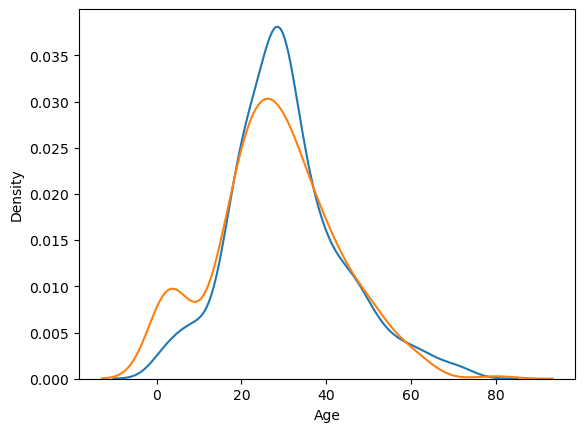

Cabin_A


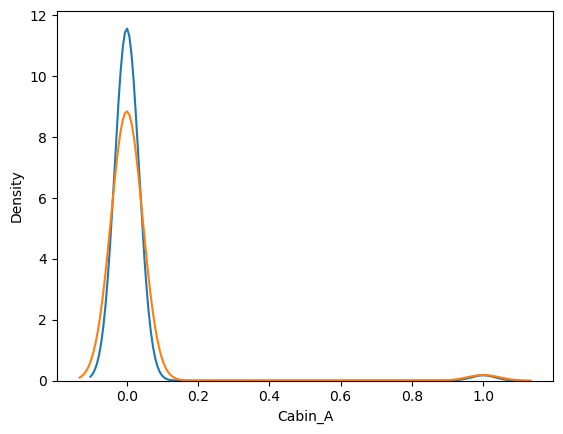

Cabin_B


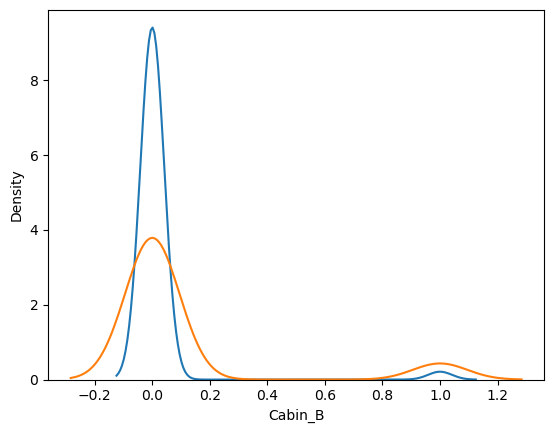

Cabin_C


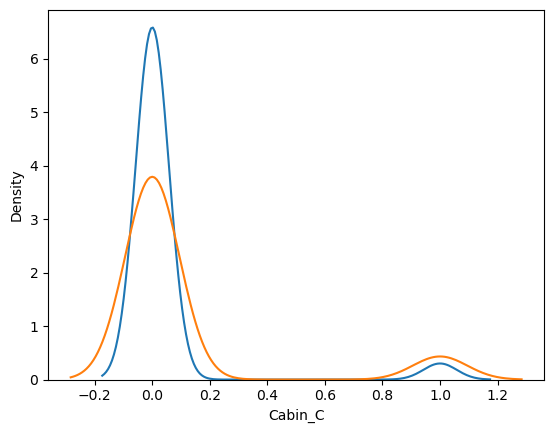

Cabin_D


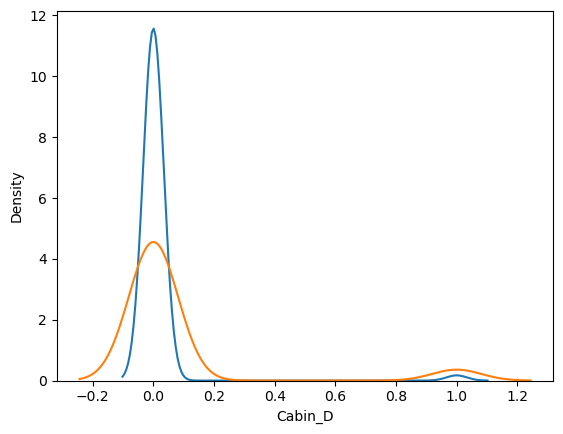

Cabin_E


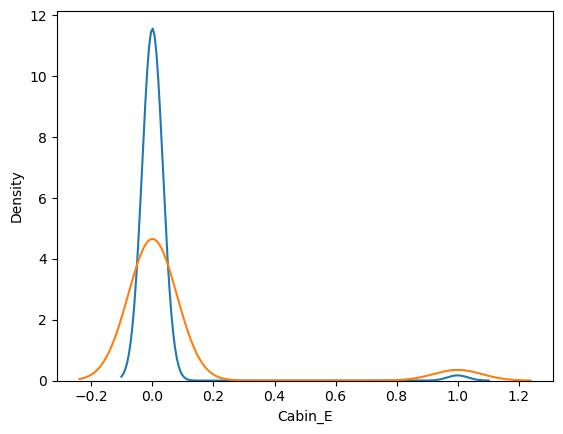

Cabin_F


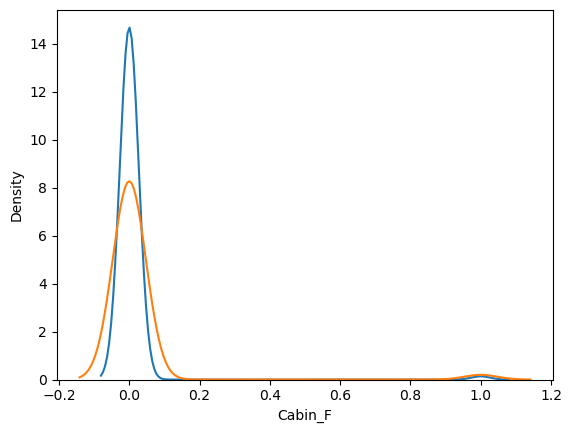

Cabin_G


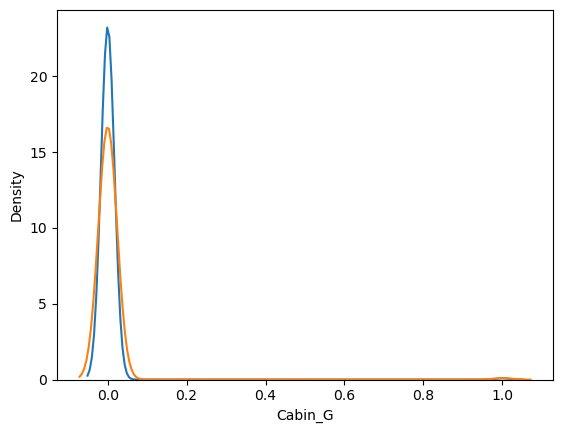

Cabin_T


C:\Users\decar\AppData\Local\Temp\ipykernel_1804\2698685099.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train["Survived"]==1][col], label="Survived=0")


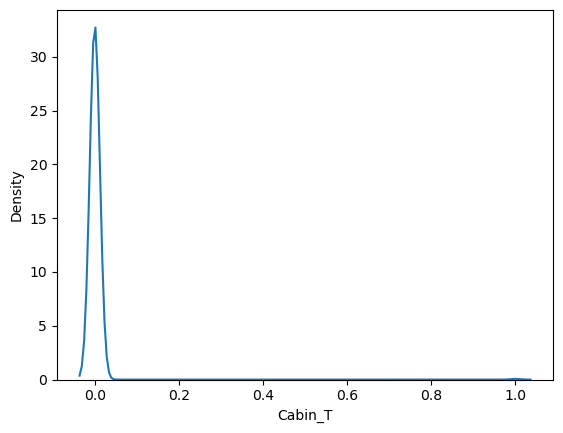

Cabin_U


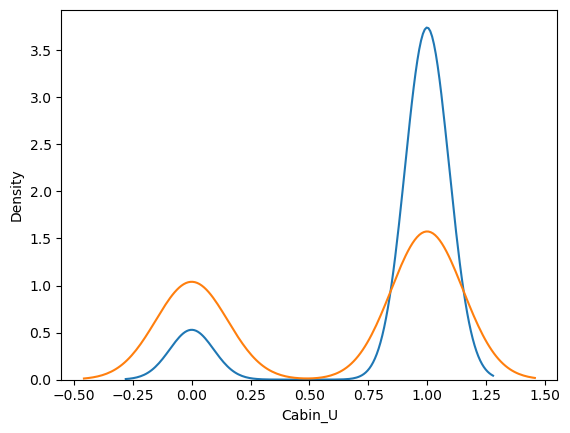

Embarked_C


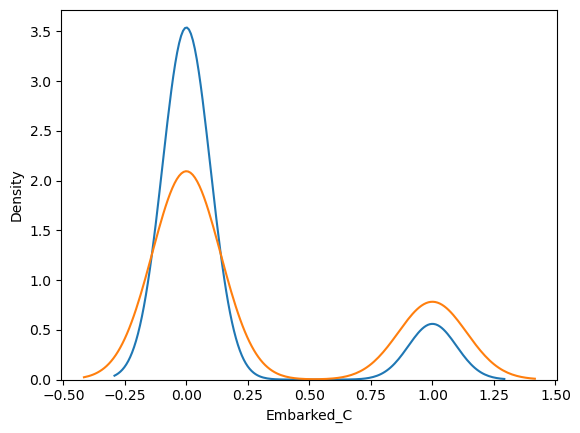

Embarked_Q


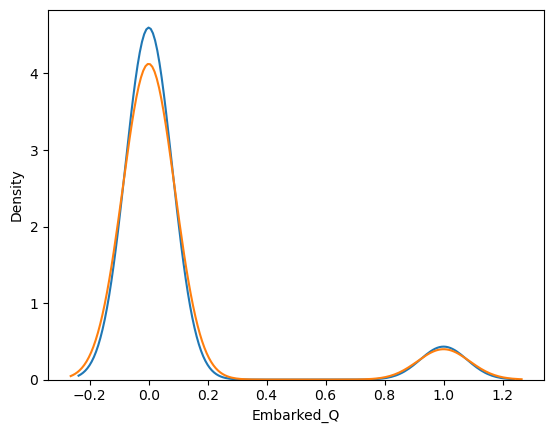

Embarked_S


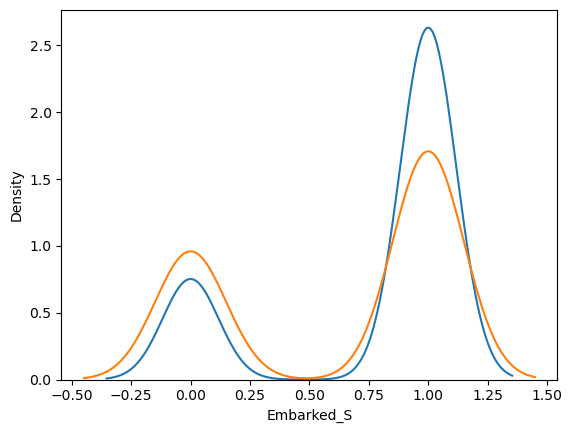

Fare


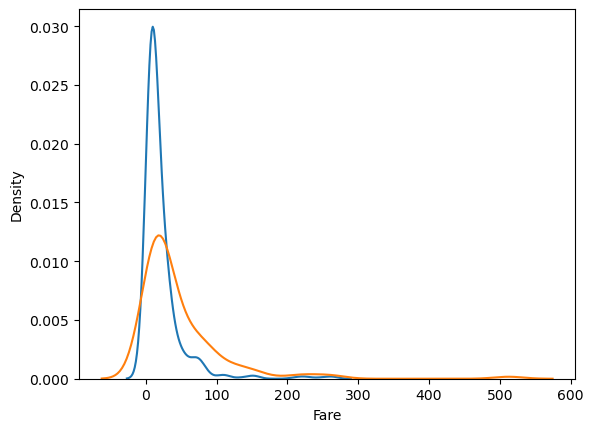

Name_ Capt


C:\Users\decar\AppData\Local\Temp\ipykernel_1804\2698685099.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train["Survived"]==1][col], label="Survived=0")


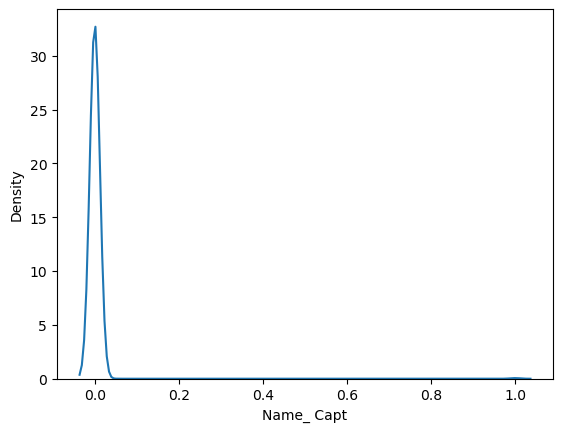

Name_ Col


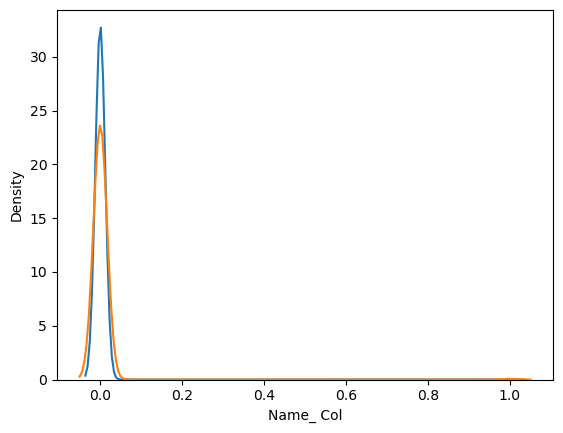

Name_ Don


C:\Users\decar\AppData\Local\Temp\ipykernel_1804\2698685099.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train["Survived"]==1][col], label="Survived=0")


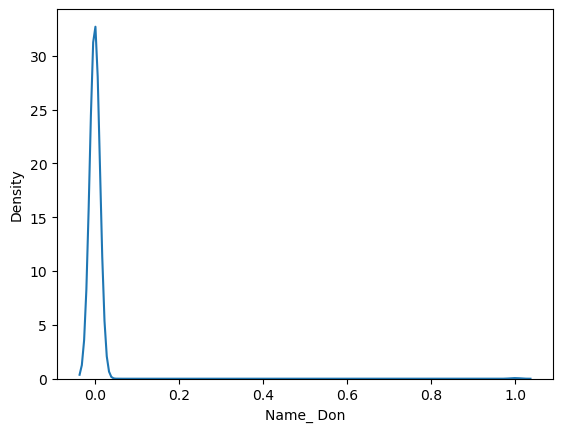

C:\Users\decar\AppData\Local\Temp\ipykernel_1804\2698685099.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train["Survived"]==0][col], label="Survived=0")


Name_ Dona


C:\Users\decar\AppData\Local\Temp\ipykernel_1804\2698685099.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train["Survived"]==1][col], label="Survived=0")


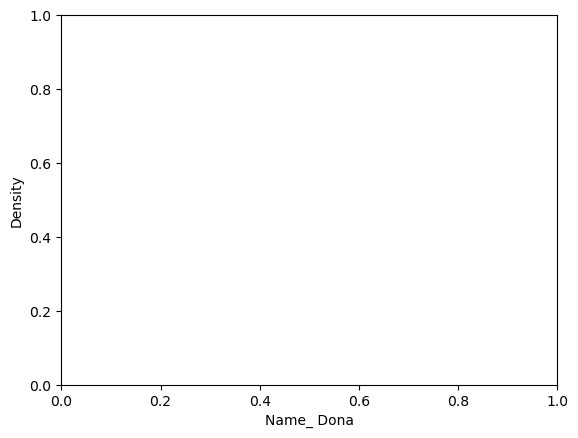

Name_ Dr


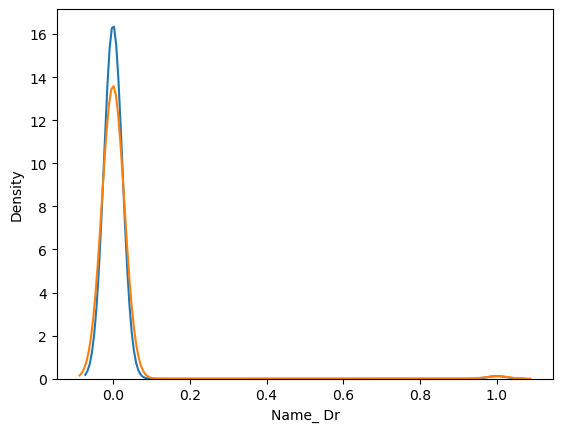

Name_ Jonkheer


C:\Users\decar\AppData\Local\Temp\ipykernel_1804\2698685099.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train["Survived"]==1][col], label="Survived=0")


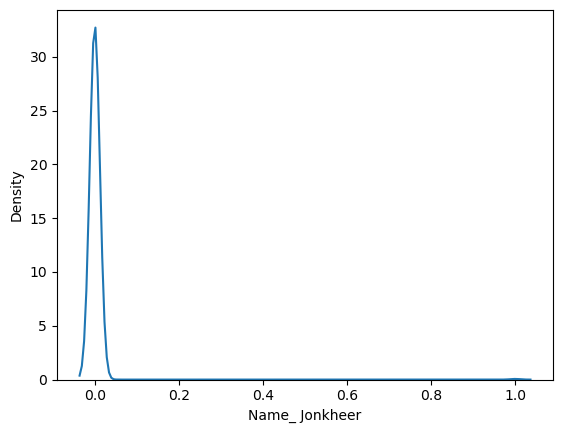

C:\Users\decar\AppData\Local\Temp\ipykernel_1804\2698685099.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train["Survived"]==0][col], label="Survived=0")


Name_ Lady


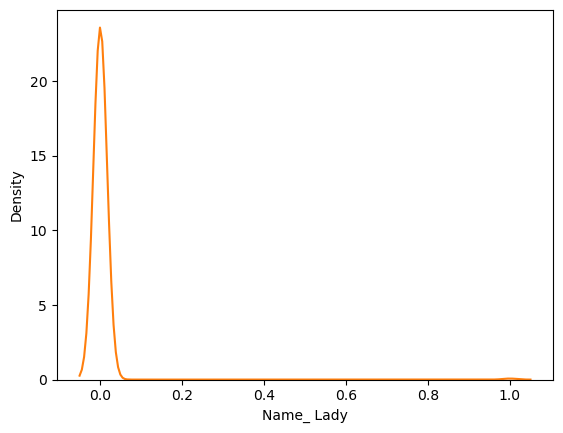

Name_ Major


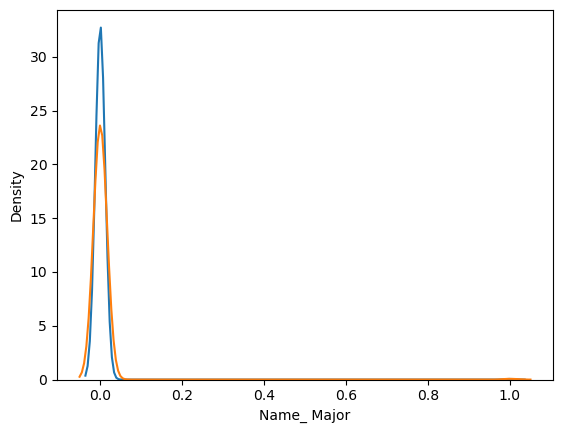

Name_ Master


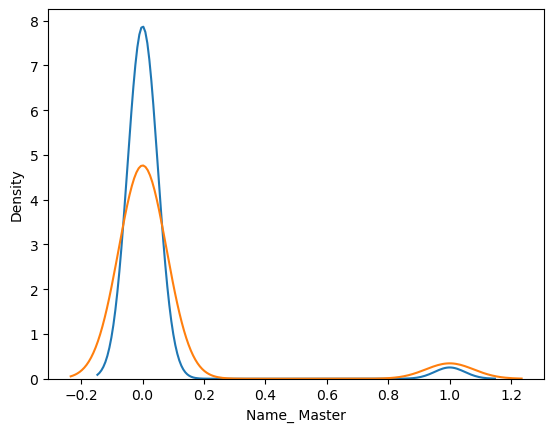

Name_ Miss


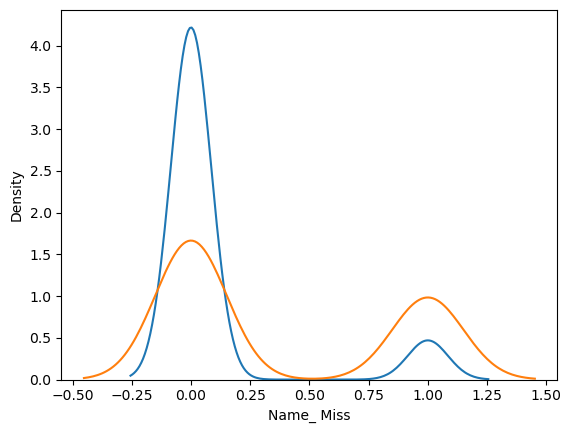

Name_ Mlle


C:\Users\decar\AppData\Local\Temp\ipykernel_1804\2698685099.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train["Survived"]==0][col], label="Survived=0")


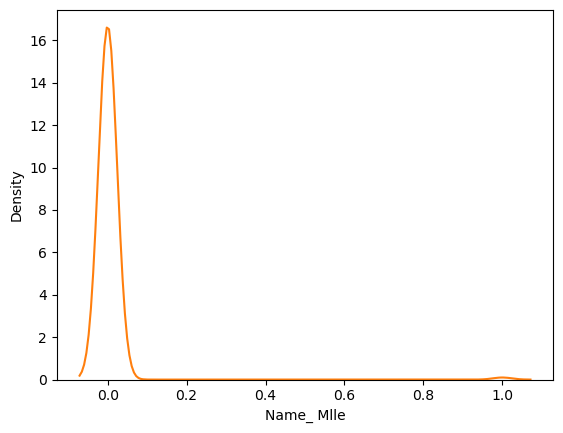

C:\Users\decar\AppData\Local\Temp\ipykernel_1804\2698685099.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train["Survived"]==0][col], label="Survived=0")


Name_ Mme


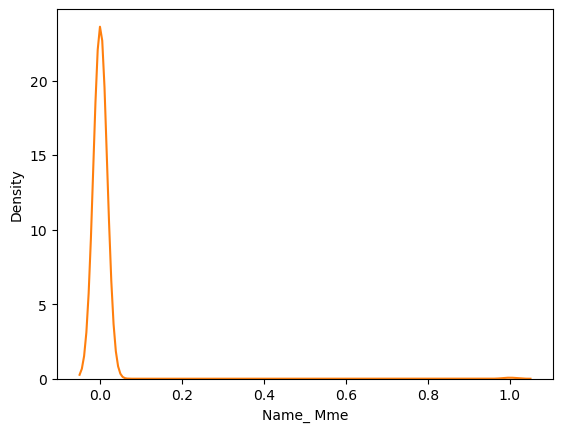

Name_ Mr


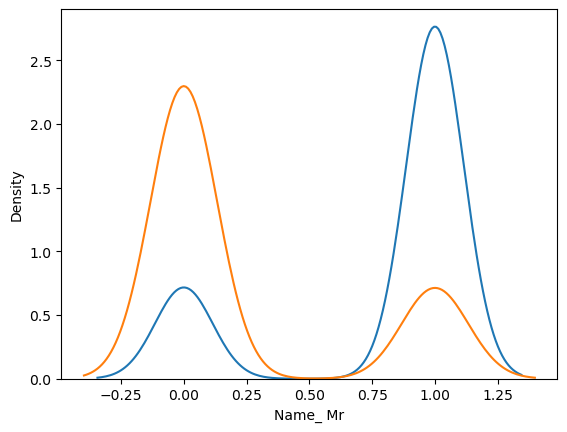

Name_ Mrs


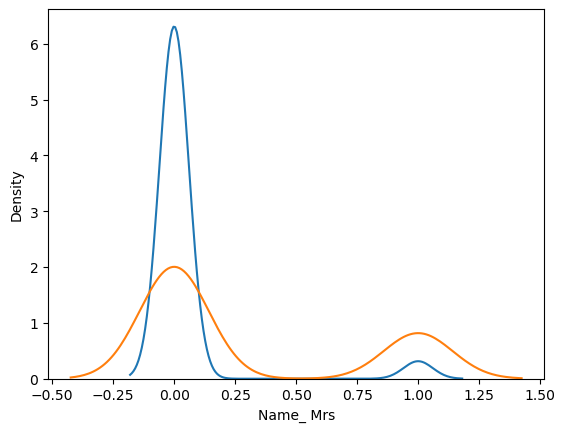

Name_ Ms


C:\Users\decar\AppData\Local\Temp\ipykernel_1804\2698685099.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train["Survived"]==0][col], label="Survived=0")


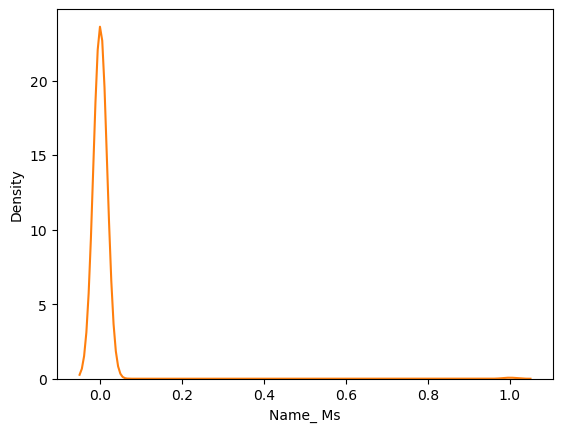

Name_ Rev


C:\Users\decar\AppData\Local\Temp\ipykernel_1804\2698685099.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train["Survived"]==1][col], label="Survived=0")


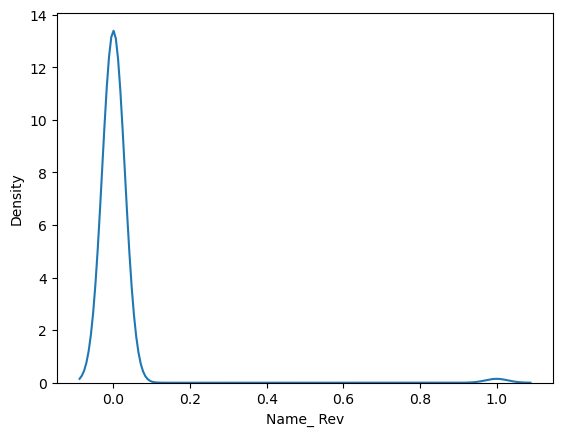

C:\Users\decar\AppData\Local\Temp\ipykernel_1804\2698685099.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train["Survived"]==0][col], label="Survived=0")


Name_ Sir


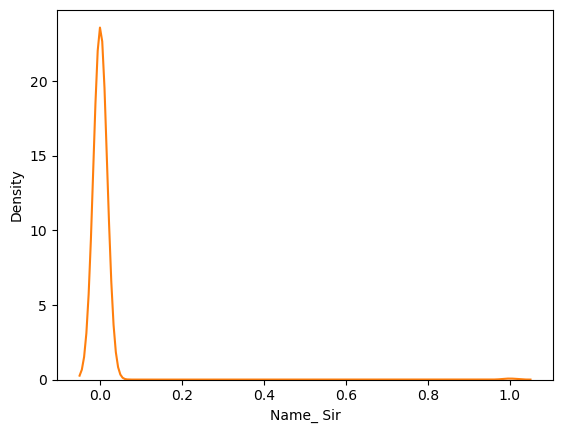

Name_ the Countess


C:\Users\decar\AppData\Local\Temp\ipykernel_1804\2698685099.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_train[df_train["Survived"]==0][col], label="Survived=0")


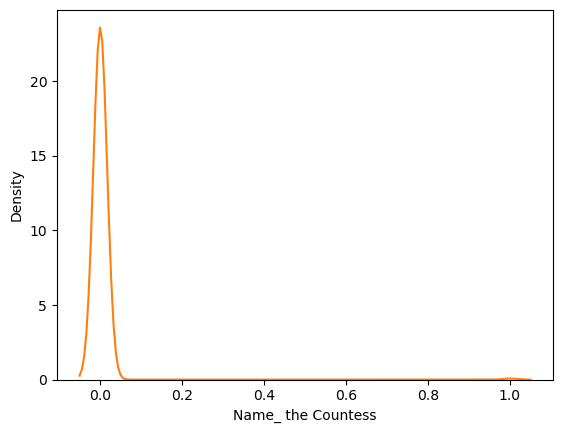

Parch


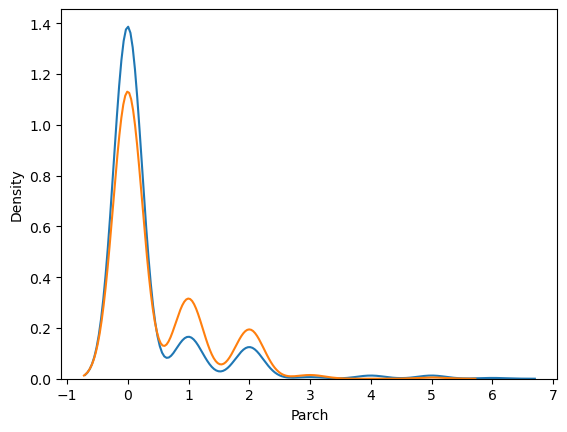

Pclass


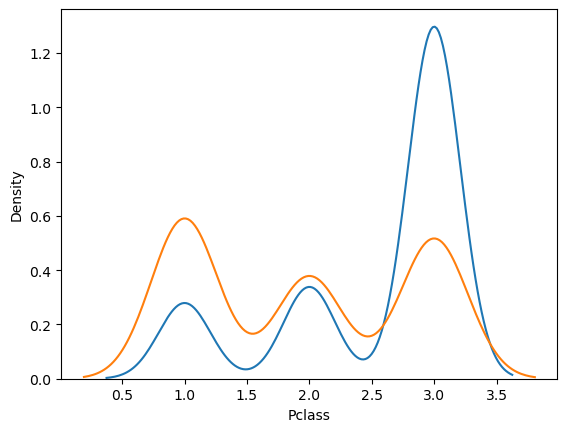

Sex_female


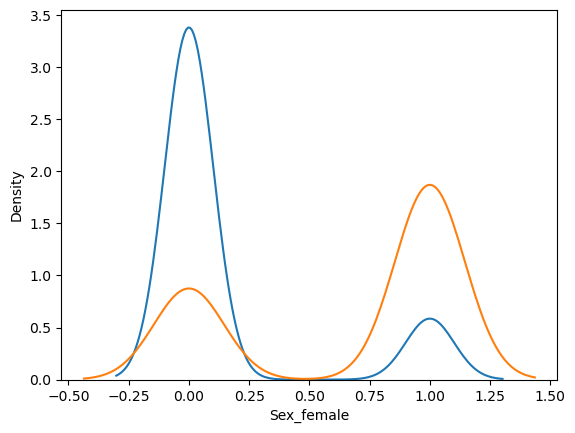

Sex_male


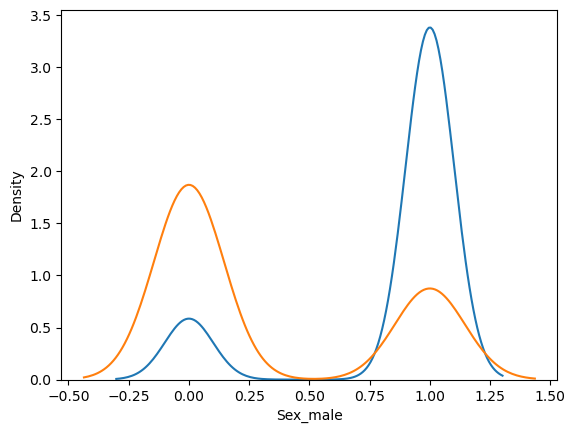

SibSp


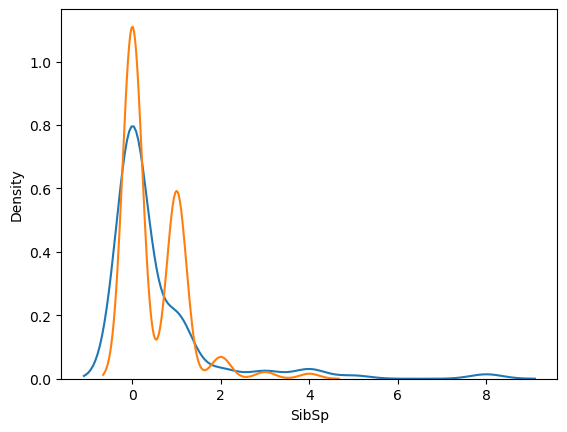

Ticket


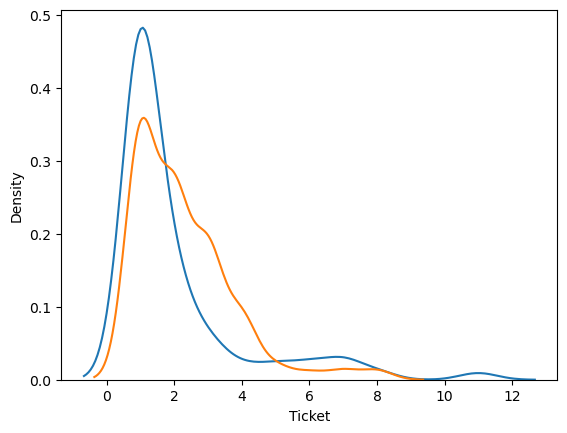

In [193]:
for col in df_test.columns:
    try:
        print(col)
        sns.kdeplot(df_train[df_train["Survived"]==0][col], label="Survived=0")
        sns.kdeplot(df_train[df_train["Survived"]==1][col], label="Survived=0")
        plt.show()
    except:
        _ = 0

In [199]:
df_train = df_train.drop(["Cabin_T", "Embarked_C", "Name_ Capt", "Sex_male"], axis=1)
df_test = df_test.drop(["Cabin_T", "Embarked_C", "Name_ Capt", "Sex_male"], axis=1)

# 生存の予測

In [202]:
x = df_train.drop("Survived", axis=1)
y = df_train["Survived"]
x_test = df_test.replace(True, 1)
x_test = df_test.replace(False, 0)
x = x.replace(True, 1)
x = x.replace(False, 0)

C:\Users\decar\AppData\Local\Temp\ipykernel_1804\3172920326.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test = df_test.replace(False, 0)
C:\Users\decar\AppData\Local\Temp\ipykernel_1804\3172920326.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x = x.replace(False, 0)


In [204]:
x

,Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_Q,...,Name_ Mrs,Name_ Ms,Name_ Rev,Name_ Sir,Name_ the Countess,Parch,Pclass,Sex_female,SibSp,Ticket
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.000000,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3,0,1,1
2,38.000000,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,2
3,26.000000,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3,1,0,1
4,35.000000,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,2
5,35.000000,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,27.962933,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3,0,0,1
864,8.531220,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,2,3,1,8,11
869,29.151727,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3,0,0,1


In [206]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as RFC
from lightgbm import LGBMClassifier as LGBMC
from sklearn.svm import SVC
from scw import SCW1
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.preprocessing import StandardScaler

In [208]:
ss = StandardScaler()
ss.fit(x)
x2 = ss.transform(x)
x_te2 = ss.transform(x_test)

In [210]:
models = []
for i in range(200):
    x_train, x_val, y_train, y_val = tts(x2, y, random_state=i, test_size=0.2, stratify=y)
    model1 = RFC()
    model1.fit(x_train, y_train)
    models.append([model1, model1.score(x_val, y_val)])
    model2 = LGBMC(verbose=-1)
    model2.fit(x_train, y_train)
    models.append([model2, model2.score(x_val, y_val)])
    model3 = SVC()
    model3.fit(x_train, y_train)
    models.append([model3, model3.score(x_val, y_val)])
    model5 = kNN()
    model5.fit(x_train, y_train)
    models.append([model5, model5.score(x_val, y_val)])
models = sorted(models, key=lambda x:x[1], reverse=True)

In [212]:
models[0]

[SVC(), 0.8938547486033519]

In [214]:
models[1]

[RandomForestClassifier(), 0.8938547486033519]

In [216]:
models[2]

[LGBMClassifier(verbose=-1), 0.8938547486033519]

In [218]:
models[3]

[LGBMClassifier(verbose=-1), 0.888268156424581]

In [220]:
models[4]

[LGBMClassifier(verbose=-1), 0.888268156424581]

In [246]:
from scipy.stats import mode
y_pred1 = models[0][0].predict(x_te2)
y_pred2 = models[1][0].predict(x_te2)
y_pred3 = models[2][0].predict(x_te2)
y_pred = []
for i in range(len(y_pred1)):
    y_pred.append(mode([y_pred1[i], y_pred2[i], y_pred3[i]])[0])

In [250]:
pred = pd.DataFrame(y_pred)
pred.columns = ["Survived"]
pred.index = x_test.index
pred.sort_index().to_csv("submit_allval11.csv")

結果は77.511%だった。
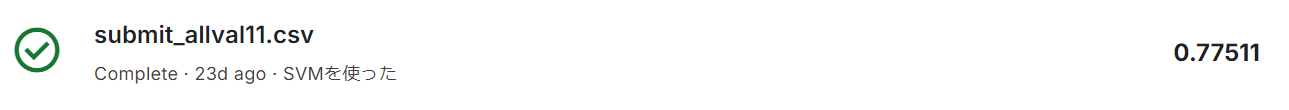

# 因子の重要度を確認
因子選定する際の参考にする

In [254]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [256]:
tree = DTC()
tree.fit(x, y)
imp = tree.feature_importances_
df_imp = pd.DataFrame(imp)
df_imp.index = x.columns
df_imp = df_imp.sort_values(0, ascending=False)
df_imp.cumsum()

,0
Name_ Mr,0.306221
Age,0.529967
Fare,0.716561
Pclass,0.791898
Ticket,0.861314
Name_ Rev,0.884447
SibSp,0.901372
Embarked_Q,0.916709
Name_ Master,0.929574
Embarked_S,0.941595


In [258]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
def biplot_spv(df, y):
    for col in df.columns:
        df[col] = (df[col] - df[col].mean()) / df[col].std()
    model = PCA()
    model.fit(df)
    df_pc = model.transform(df)
    com = model.components_
    evr = model.explained_variance_ratio_
    fac = []
    for i in range(len(evr)):
        fac.append(np.sqrt(model.explained_variance_ratio_)[i] * model.components_[i])
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax2.scatter(df_pc[:, 0], df_pc[:, 1], cmap="brg", c=y, marker="x")
    ax3 = ax1.twiny()
    ylim = [abs(max(fac[1])), abs(min(fac[1]))]
    xlim = [abs(max(fac[0])), abs(min(fac[0]))]
    for i in range(len(df.columns)):
        ax3.plot([0, fac[0][i]], [0, fac[1][i]], color="#FF0000")
        ax3.text(fac[0][i], fac[1][i], df.columns[i])
    ax3.set_xlim(-max(xlim), max(xlim))
    ax3.set_ylim(-max(ylim), max(ylim))
    plt.show()

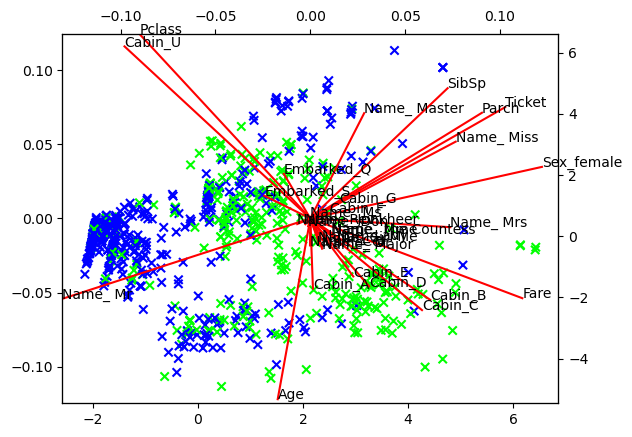

In [260]:
biplot_spv(x, y)